In [1]:
import pandas
df = pandas.read_sas(r"C:\Users\Johannes.Nagele\Downloads\LLCP2020XPT\LLCP2020.xpt")

c:\projects\betapoisson\venv\lib\site-packages\pandas\io\sas\sas_xport.py:475: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[x] = v


In [56]:
df['AVEDRNK3'].iloc[df['AVEDRNK3'] == 88] = 0
df['PHYSHLTH'].iloc[df['PHYSHLTH'] == 88] = 0
df['FALL12MN'].iloc[df['FALL12MN'] == 88] = 0
df['FALLINJ4'].iloc[df['FALLINJ4'] == 88] = 0


c:\projects\betapoisson\venv\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Correlated?


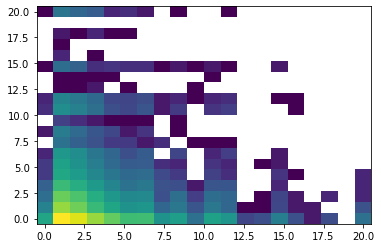

In [55]:
from matplotlib import pyplot as plt
import matplotlib as mpl
plt.hist2d(x = df["AVEDRNK3"],
           y = df["FALL12MN"],
           range=[[-.5,20.5], [-.5,20.5]], bins = 20, norm=mpl.colors.LogNorm())
print("Correlated?")

(array([1.297e+03, 4.770e+02, 1.160e+02, 4.500e+01, 2.000e+01, 1.600e+01,
        1.100e+01, 3.000e+00, 4.000e+00, 1.000e+00, 5.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-0.5 ,  0.55,  1.6 ,  2.65,  3.7 ,  4.75,  5.8 ,  6.85,  7.9 ,
         8.95, 10.  , 11.05, 12.1 , 13.15, 14.2 , 15.25, 16.3 , 17.35,
        18.4 , 19.45, 20.5 ]),
 <BarContainer object of 20 artists>)

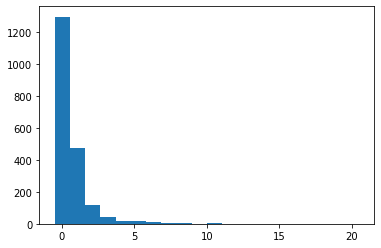

In [58]:
#plt.hist(df['FALL12MN'][:10000], range=[-.5,20.5], bins = 20)
plt.hist(df['FALLINJ4'][:10000], range=[-.5,20.5], bins = 20)

In [ ]:
from betapoisson import BetaPoisson
import scipy
from scipy.stats import poisson
alpha = .01 # significance level

for col in ['FALLINJ4', 'AVEDRNK3', 'FALL12MN', 'PHYSHLTH']:
    print("===========")
    print(col)
    y = df[col]#.iloc[:10000]
    y = y[y<76]
    bp = BetaPoisson()
    res = bp.fit(y, workers = 6)
    
    print("Poisson logLikelihood: ", sum(np.log(poisson(np.mean(y)).pmf(y))))
    print("BetaPoisosn logLikelihood: ", -res.fun)
    def bic(params,y,logL):
        return len(params)*np.log(len(y)) - 2*logL

    lLog_Poisson = sum(np.log(poisson(np.mean(y)).pmf(y)))
    lLog_BetaPoisson = -res.fun

    print("Poisson BIC", bic([np.mean(y)], y, lLog_Poisson))
    print("betaPoisson BIC", bic(res.x, y, lLog_BetaPoisson))

    #calculate likelihood ratio Chi-Squared test statistic
    LR_statistic = -2*(lLog_Poisson - (-res.fun))

    print("LR statistic: ", LR_statistic)

    #calculate p-value of test statistic using 1 degree of freedom (the complex model has 1 parameter more)
    p_val = scipy.stats.chi2.sf(LR_statistic, 1)

    if p_val < alpha:
        print("Since the p-value of the likelihood ratio test is close to 0 the more complex model is to be preferred!")
    else:
        print("Since the p-value of the likelihood ratio test is not below alpha the nested model is to be preferred!")
        
    mu_max = res.x[0]
    p = res.x[1]
    q = .5
    plt.figure()
    plt.hist(y, range=[-.5,20.5], bins = 20, density=True)
    plt.plot(bp.pmf(np.arange(20), mu_max,p,q))
    plt.plot(poisson.pmf(np.arange(20), np.mean(y)))

FALLINJ4


c:\projects\betapoisson\venv\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


Poisson logLikelihood:  -95316.6438991771
BetaPoisosn logLikelihood:  -84367.99083677107
Poisson BIC 190644.41585514086
betaPoisson BIC 168758.23778711547
LR statistic:  21897.30612481205
Since the p-value of the likelihood ratio test is close to 0 the more complex model is to be preferred!
AVEDRNK3


c:\projects\betapoisson\venv\lib\site-packages\scipy\optimize\_differentialevolution.py:535: UserWarning: differential_evolution: the 'workers' keyword has overridden updating='immediate' to updating='deferred'
  " updating='deferred'", UserWarning)


Poisson logLikelihood:  -363241.40816538275
BetaPoisosn logLikelihood:  -361867.16805239604
Poisson BIC 726494.9585899602
betaPoisson BIC 723758.6206231817
LR statistic:  2748.4802259734133
Since the p-value of the likelihood ratio test is close to 0 the more complex model is to be preferred!
FALL12MN


c:\projects\betapoisson\venv\lib\site-packages\scipy\optimize\_differentialevolution.py:535: UserWarning: differential_evolution: the 'workers' keyword has overridden updating='immediate' to updating='deferred'
  " updating='deferred'", UserWarning)
C:\projects\betapoisson\betapoisson.py:40: RuntimeWarning: divide by zero encountered in log
  return n*(gammaln(p+q) - mu_max - gammaln(p)) + np.log(mu_max)*np.sum(x) + np.sum(gammaln(p+x)) +\
C:\projects\betapoisson\betapoisson.py:40: RuntimeWarning: invalid value encountered in double_scalars
  return n*(gammaln(p+q) - mu_max - gammaln(p)) + np.log(mu_max)*np.sum(x) + np.sum(gammaln(p+x)) +\


Poisson logLikelihood:  -440245.782019192
BetaPoisosn logLikelihood:  -301120.99117135745
Poisson BIC 880504.0342391222
betaPoisson BIC 602266.9227441913
LR statistic:  278249.5816956691
Since the p-value of the likelihood ratio test is close to 0 the more complex model is to be preferred!
PHYSHLTH


c:\projects\betapoisson\venv\lib\site-packages\scipy\optimize\_differentialevolution.py:535: UserWarning: differential_evolution: the 'workers' keyword has overridden updating='immediate' to updating='deferred'
  " updating='deferred'", UserWarning)


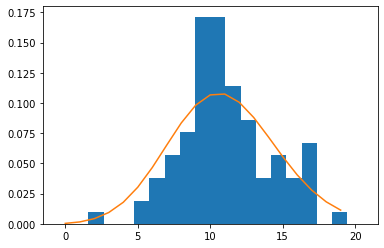

In [95]:
import numpy as np
mu_max = res.x[0]
p = res.x[1]
q = .5
plt.hist(y, range=[-.5,20.5], bins = 20, density=True)
plt.plot(bp.pmf(np.arange(20), mu_max,p,q))
logL = bp.loglikelihood(y, mu_max,p,q)